# Processamento de Linguagem Natural Com SpaCy e NLTK

## Importação das Bibliotecas

In [ ]:
!pip install spacy

In [3]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [ ]:
!python3 -m spacy download pt

## Marcação POS


*   POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
*   Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém


*   Lista de tokens: https://spacy.io/api/annotation#pos-tagging
*   Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/





In [5]:
pln = spacy.load('pt')
pln

In [9]:
documento = pln('Eu estou aprendendo processamento de linguagem natural, em SP.')

In [10]:
type(documento)

spacy.tokens.doc.Doc

In [11]:
for token in documento:
  print(token.text, token.pos_)

Eu PRON
estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
em ADP
SP PROPN
. PUNCT


## Lematização e stemização

In [12]:
for token in documento:
  print(token.text, token.lemma_)

Eu Eu
estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
em em
SP SP
. .


In [13]:
doc = pln('encontrei encontraram encontrarão cursando curso cursei')

In [14]:
for token in doc:
  print(token.text, token.lemma_)

encontrei encontrar
encontraram encontrar
encontrarão encontrar
cursando cursar
curso cursar
cursei cursar


In [15]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [16]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [17]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Eu Eu eu
estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
em em em
SP SP sp
. . .


## Carregamento dos Textos

In [23]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [24]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"24f11dba-010f-4801-b304-9d0bc05f6607","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":63671419,"wgRevisionId":63671419,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1ginas com erros e

In [ ]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

In [26]:
paragrafos = dados_html.find_all('p')

In [27]:
len(paragrafos)

108

In [30]:
paragrafos[1].text

'Conteúdo'

In [31]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [32]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\nConteúdoInteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes[1], além de também ser um campo de estudo acadêmico.[2]\nO principal objetivo dos sistemas de IA, é executar funções que, caso um ser humano fosse executar, seriam consideradas inteligentes. É um conceito amplo, e que recebe tantas definições quanto damos significados diferentes à palavra inteligência.[3] Podemos pensar em algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos de forma que no futuro agirá de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capaci

In [33]:
conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\nconteúdointeligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes[1], além de também ser um campo de estudo acadêmico.[2]\no principal objetivo dos sistemas de ia, é executar funções que, caso um ser humano fosse executar, seriam consideradas inteligentes. é um conceito amplo, e que recebe tantas definições quanto damos significados diferentes à palavra inteligência.[3] podemos pensar em algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos de forma que no futuro agirá de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capaci

## Buscas em textos com SpaCy

In [34]:
pln = spacy.load('pt')
pln

In [36]:
string = 'turing'
token_pesquisa = pln(string)

In [37]:
pln.vocab

In [39]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [40]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3051, 3052),
 (8661325627334373315, 3061, 3062),
 (8661325627334373315, 3217, 3218),
 (8661325627334373315, 3222, 3223),
 (8661325627334373315, 3228, 3229),
 (8661325627334373315, 3291, 3292),
 (8661325627334373315, 3923, 3924),
 (8661325627334373315, 5198, 5199),
 (8661325627334373315, 8667, 8668),
 (8661325627334373315, 8803, 8804),
 (8661325627334373315, 8899, 8900),
 (8661325627334373315, 9016, 9017)]

In [43]:
doc[3051 - 5:3052 + 5]

uma contribuição prática de alan turing foi o que se chamou

In [42]:
doc[3061:3062]

turing

In [44]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 3051, 3052), 3051, 3052)

In [50]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados: </strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br><br>"
display(HTML(f"""... {texto} ..."""))

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[2 MISC
cotidiano).[4 ORG
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan turing[5 PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
google ORG
wikipedia MISC
john mccarthy PER
bot MISC
robot MISC
bot MISC
ia MISC
‘deep learning’ ORG
john haugeland PER
good old-fashioned artificial intelligence MISC
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
club ORG
inglaterra LOC
david rumelhart PER
fuzzy PER
humana.[14 MISC
isaac asimov PER
sociedade.[15 LOC
steven spielberg PER
asimov PER
robótica.[8 ORG
stephen hawking PER
alan turing PER
turing PER
tt LOC
tt ORG
ella LOC
turing PER
turing PER
turing PER
turing PER
colossus PER
turing PER
linguistic internet computer entity MISC
internet MISC
java MISC
john searle PER
hubert dreyfus PER
searle PER
minsky PER
turing PER
dreyfus MI

In [51]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvem de Palavras e Stop Words

In [59]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'teus', 'sim', 'forma', 'custa', 'duas', 'vindo', 'nada', 'vossa', 'comprida', 'sabe', 'nesta', 'cinco', 'que', 'dar', 'esses', 'vós', 'este', 'faz', 'tendes', 'tive', 'estado', 'tentar', 'cima', 'lado', 'sétima', 'vossos', 'cada', 'ser', 'teu', 'quatro', 'depois', 'local', 'segundo', 'final', 'agora', 'como', 'essa', 'às', 'maior', 'debaixo', 'ir', 'naquele', 'apoia', 'cuja', 'valor', 'estivestes', 'obrigado', 'dezasseis', 'na', 'posso', 'até', 'outra', 'acerca', 'diante', 'vos', 'longe', 'algo', 'dezanove', 'estive', 'disso', 'vossas', 'coisa', 'dois', 'quinze', 'terceiro', 'toda', 'entre', 'tentaram', 'meus', 'grande', 'parece', 'estás', 'vez', 'mil', 'tuas', 'com', 'tudo', 'cá', 'ligado', 'vocês', 'cento', 'és', 'números', 'cedo', 'quinto', 'primeiro', 'nova', 'maioria', 'ao', 'poder', 'apoio', 'tal', 'ambas', 'nesse', 'tão', 'momento', 'menor', 'questão', 'vários', 'sei', 'dos', 'pouco', 'estão', 'neste', 'dizer', 'ambos', 'umas', 'fará', 'já', 'os', 'mesmo', 'ponto', 'têm', 'ven

In [60]:
len(STOP_WORDS)

413

In [63]:
pln.vocab['usa'].is_stop

True

In [65]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [66]:
print(lista_token)

['\n\t\t', 'páginas', 'para', 'editores', 'conectados', 'saiba', 'mais', '\n', 'conteúdointeligência', 'artificial', '(', 'por', 'vezes', 'mencionada', 'pela', 'sigla', 'em', 'português', 'ia', 'ou', 'pela', 'sigla', 'em', 'inglês', 'ai', '-', 'artificial', 'intelligence', ')', 'é', 'a', 'inteligência', 'demonstrada', 'por', 'máquinas', 'a', 'o', 'executar', 'tarefas', 'complexas', 'associadas', 'a', 'seres', 'inteligentes[1', ']', ',', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico.[2', ']', '\n', 'o', 'principal', 'objetivo', 'dos', 'sistemas', 'de', 'ia', ',', 'é', 'executar', 'funções', 'que', ',', 'caso', 'um', 'ser', 'humano', 'fosse', 'executar', ',', 'seriam', 'consideradas', 'inteligentes', '.', 'é', 'um', 'conceito', 'amplo', ',', 'e', 'que', 'recebe', 'tantas', 'definições', 'quanto', 'damos', 'significados', 'diferentes', 'à', 'palavra', 'inteligência.[3', ']', 'podemos', 'pensar', 'em', 'algumas', 'características', 'básicas', 'd', 'esses', 'siste

In [67]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [69]:
print(sem_stop)

['\n\t\t', 'páginas', 'editores', 'conectados', 'saiba', '\n', 'conteúdointeligência', 'artificial', '(', 'mencionada', 'sigla', 'português', 'ia', 'sigla', 'inglês', 'ai', '-', 'artificial', 'intelligence', ')', 'a', 'inteligência', 'demonstrada', 'máquinas', 'a', 'o', 'executar', 'tarefas', 'complexas', 'associadas', 'a', 'seres', 'inteligentes[1', ']', ',', 'campo', 'estudo', 'acadêmico.[2', ']', '\n', 'o', 'principal', 'objetivo', 'sistemas', 'ia', ',', 'executar', 'funções', ',', 'caso', 'humano', 'fosse', 'executar', ',', 'seriam', 'consideradas', 'inteligentes', '.', 'conceito', 'amplo', ',', 'e', 'recebe', 'tantas', 'definições', 'damos', 'significados', 'diferentes', 'palavra', 'inteligência.[3', ']', 'podemos', 'pensar', 'características', 'básicas', 'd', 'sistemas', ',', 'a', 'capacidade', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'a', 'conjunto', 'dados', 'disponíveis', 'chegar', 'a', 'conclusão', ')', ',', 'aprendizagem', '(', 'aprender', 'erros', 'e', 'acertos', 

In [68]:
len(sem_stop)

6610

In [53]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [55]:
from wordcloud import WordCloud
cloud = WordCloud(background_color='white', max_words= 100, colormap=color_map)

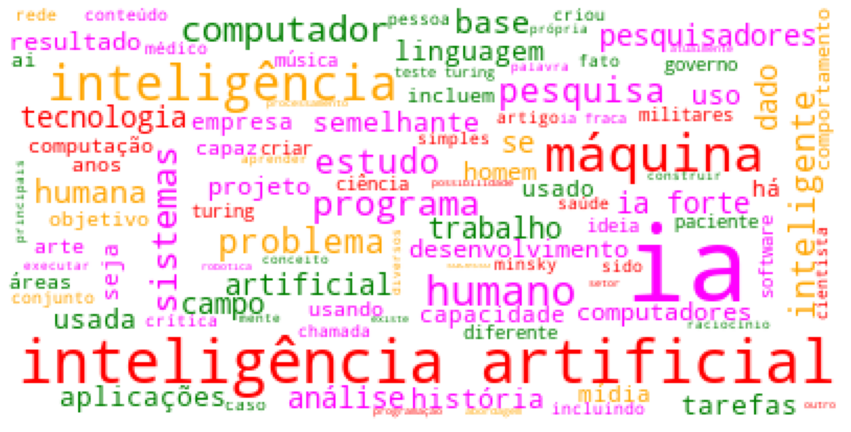

In [72]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()